<a href="https://colab.research.google.com/github/Xiumin-Lin/lab-deep-learning/blob/master/Esiee/Deep_learning_TD1_Lin_%26_Loyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaptive Noise Cancellation
Doctor, in trying to review the electroencephalogram (EEG) of a distracted graduate student, finds that the signal he would like to see has been contaminated by a 60-Hz noise source. He is examining the patient on-line and wants to view the best signal that can be obtained.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from keras import models
from keras import layers
from keras import optimizers


# Obtain the pure EEG Signal $S(k)$ from the data file *Data_EEG.txt*

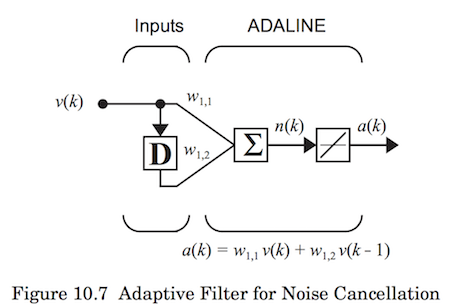

In [3]:
# Architecture of ADALINE of order 1:

from IPython.display import Image
Image("Adaline_Adaptive_Filter.png")

In [4]:
S=np.loadtxt('Data_EEG.txt',skiprows=1,unpack=True)
S_sqr=np.square(S)
Mean_S_sqr=np.mean(S_sqr)
n=len(S)
print("Mean_S_sqr :", Mean_S_sqr)
print("n :", n)

Mean_S_sqr : 0.012622176222222224
n : 90


# Create the unfiltered signal $t(k)=S(k)+m(k)$
- $S(k)$: is the **pure EEG signal**
- $v(k)$: is the sampled sinusoidal electrical network signal (three times in a period) and considered as the input signal to ADALINE network and its output
- $m(k)$:  is the noisy signal comming from the electrical network.
- $t(k)$: is the unfiltered signal (t(k)=S(k)+m(k))
- $a(k)$: is the estimation of the noisy signal m(k).
- plot the pure signal $S(k)$ and unfiltered signal $T(k)$ in order to evaluate the filtering operated by ADALINE network.

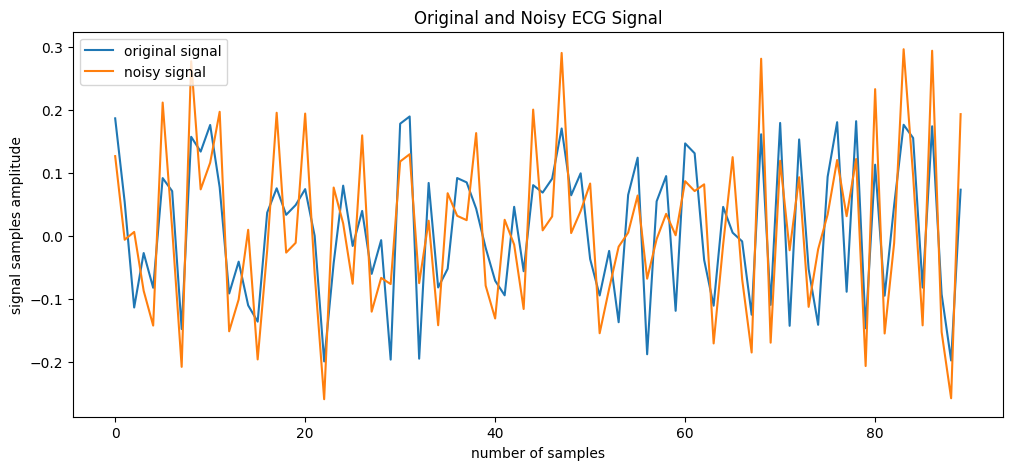

In [5]:
v=[]
m=[]
for i in range(30):
     v=np.concatenate((v,[1.2*np.sin(2*np.pi*(1/3)), 1.2*np.sin(2*np.pi*(2/3)), 1.2*np.sin(2*np.pi*(3/3))]))
     m=np.concatenate((m,[0.12*np.sin((2*np.pi*(1/3))+np.pi/2), 0.12*np.sin((2*np.pi*(2/3))+np.pi/2), 0.12*np.sin((2*np.pi*(3/3))+np.pi/2)]))

# Contaminated output signal
t=S+m
#..........................
plt.figure(1,figsize=(12,5))
plt.plot(S)
plt.plot(t)
plt.legend(('original signal','noisy signal'),loc='upper left')
plt.title('Original and Noisy ECG Signal')
plt.xlabel('number of samples')
plt.ylabel('signal samples amplitude')
plt.show()

# Filter Order Selection
ADALINE output $a(t)$ may be calculated based on:
- a first order model given in the figure using the mathematical expression: $a(k)=w_{11}v(k)+w_{12}v(k-1)$
- a second order model given by  the mathematical expression:  $a(k)=w_{11}v(k)+w_{12}v(k-1)+ w_{13}v(k-2)$

where the order is the number of retarded inputs signals used as input to neural network.

# First Order Filter Design:  Optimal Solution
- The optimal solution is obtained by minimizing **least mean square** (LMS) between
the unfiltered signal T(k) and the output of the second order filter given
by $a(k)=w_{11}v(k)+w_{12}v(k-1)$. For more details please **see course slide nr.19**.
- $Min_{(w_{11},w_{12})}\frac{1}{n}\|\sum_1^n(T(k)-a(k))\|$, where $n=dim(T)$
- Let us note: $x=[w_1, b]^T$ and $ z=[v,1]^T \Rightarrow a=x^Tz $ is the ADALINE output
- Solution:  $w=R^{-1}h$ where  $h=E[tz]$ and   $R=E[zz^T]$
- In our calculation we have considered that the biais value $b=0$





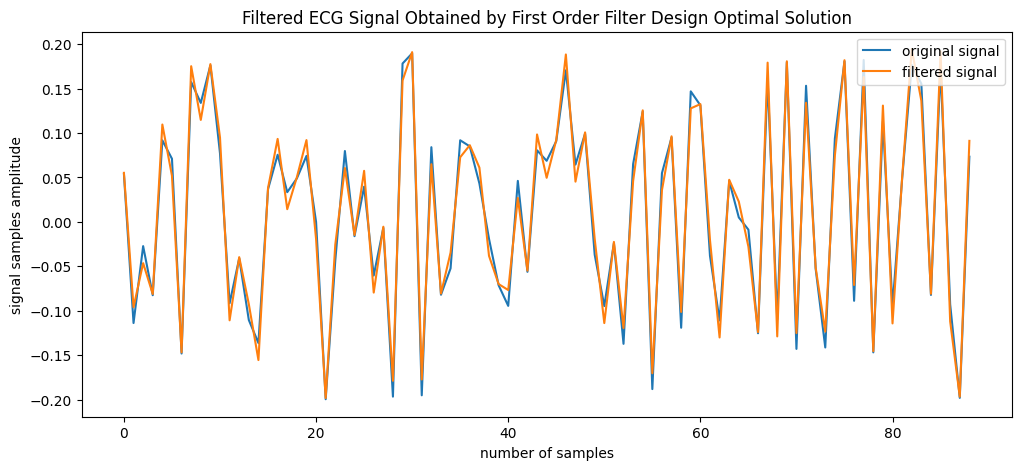

In [6]:
case="1ordre"
if case=='1ordre': # case of third order filter calculation
    n=len(t)-1
    w=np.array([0 , 0])   # initial values of synaptic weights
    b=0                   # initial values of baised value
    a=np.zeros(len(t)-1)  # initial value of ADALINE network output
    V=np.array([v[1:90], v[0:89]]) # input signal
    T=t[1:90] # target signal

# Minimizing the square of difference between target signal and ADALINE network output
# Optimal solution (see course slide nr. 19)
    Cov_R=np.cov(v[1:90], v[0:89])
    Cov_h=np.dot(V,T.T)/len(t[1:])
    w1=np.dot(inv(Cov_R),Cov_h.T)
    a1=np.dot(w1.T,V) # simulate the ADALINE for optimal solution on input signals
    e1=T-a1 # Initial filtered signal values

    plt.figure(2,figsize=(12,5))
    plt.plot(S[1:90])
    plt.plot(e1)
    plt.legend(('original signal','filtered signal'),loc='upper right')
    plt.title('Filtered ECG Signal Obtained by First Order Filter Design Optimal Solution')
    plt.xlabel('number of samples')
    plt.ylabel('signal samples amplitude')
    plt.show()


## Analyse
On peut remarquer grâce au graphe que le filtre de premier ordre a bien fonctionné. Le signal filtré E1 est proche du signal original S.

---



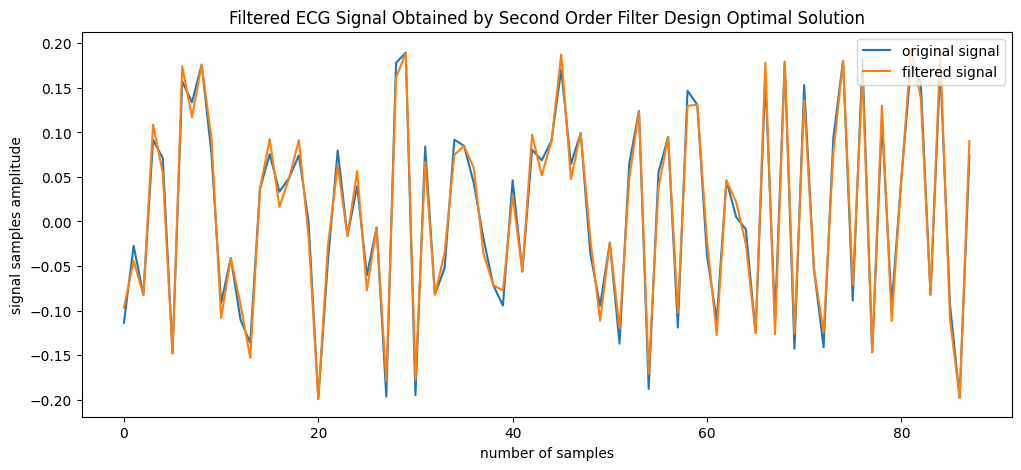

In [7]:
# Second Order Filter Design
case="2ordre"
if case=='2ordre':
    w=np.array([0, 0, 0]) # initial values of synaptic weights
    b=0                   # initial values of baised value
    a=np.zeros(len(t)-2)  # initial value of ADALINE network output
    V=np.array([v[2:90], v[1:89], v[0:88]]) # input signal
    T=t[2:90] # target signal


# Minimizing the square of difference between target signal and ADALINE network output
# Optimal solution (see course slide nr. 19)
    Cov_R=np.cov(V)
    Cov_h=np.dot(V,T.T)/len(t[2:])
    w2=np.dot(inv(Cov_R),Cov_h.T)
    a2=np.dot(w2.T,V) # simulate the ADALINE for optimal solution on input signals
    e2=T-a2 # Initial filtered signal values

    plt.figure(3,figsize=(12,5))
    plt.plot(S[2:90])
    plt.plot(e2)
    plt.legend(('original signal','filtered signal'),loc='upper right')
    plt.title('Filtered ECG Signal Obtained by Second Order Filter Design Optimal Solution')
    plt.xlabel('number of samples')
    plt.ylabel('signal samples amplitude')
    plt.show()

## Analyse
De même, grâce au graphique obtenu via le filtre de second ordre, le signal filtré E2 est proche du signal original S, quasiment identique à E1.

---



Adaptative noise signal diff :
- First order : 0.00022676803129101678
- Second order: 0.0001925287852526524
- Diffence A1 A2: 3.423924603836439e-05

Original signal MSE diff :
- First order : 0.00022676803129101692
- Second order: 0.00019252878525265248
- Diffence E1 E2: 3.423924603836444e-05



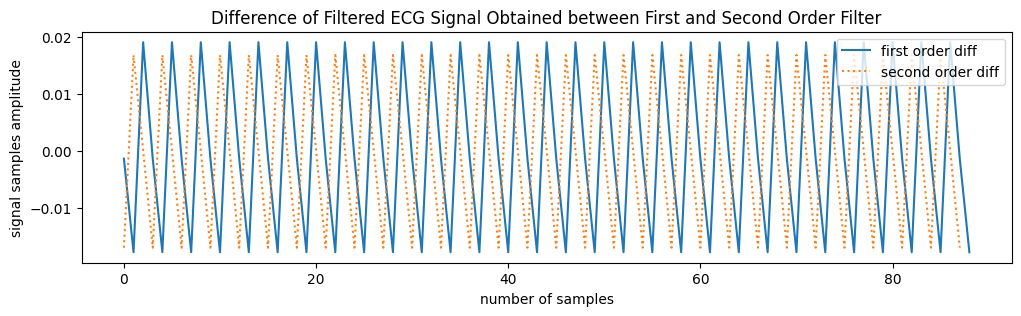

In [8]:
# Check difference between E1 and E2

## Mean Square Error for Adaptative noise signal
MSE_A1 = ((m[1:90] - a1) ** 2).mean()
MSE_A2 = ((m[2:90] - a2) ** 2).mean()

print('Adaptative noise signal diff :')
print("- First order : {}".format(MSE_A1))
print("- Second order: {}".format(MSE_A2))
print("- Diffence A1 A2: {}".format(MSE_A1 - MSE_A2))
print()

## Mean Square Error for original signal
diff_original_1 = S[1:90] - e1
diff_original_2 = S[2:90] - e2
MSE_E1 = ((diff_original_1) ** 2).mean()
MSE_E2 = ((diff_original_2) ** 2).mean()

print('Original signal MSE diff :')
print("- First order : {}".format(MSE_E1))
print("- Second order: {}".format(MSE_E2))
print("- Diffence E1 E2: {}".format(MSE_E1 - MSE_E2))
print()
#...................................
plt.figure(4,figsize=(12,3))
plt.plot(diff_original_1)
plt.plot(diff_original_2, ':')
plt.legend(['first order diff', 'second order diff'], loc='upper right')
plt.title('Difference of Filtered ECG Signal Obtained between First and Second Order Filter')
plt.xlabel('number of samples')
plt.ylabel('signal samples amplitude')
plt.show()

## Analyse :
Comparé au avec le signal original, on peut remarquer que le filtre de second ordre est plus précis que celui du premier ordre. Un avantage cependant minime. De l'ordre de 10^-5.


---

# First Order Filter Design: ADALINE Design Based on Iterative Solution
- The optimal solution is obtained by minimizing **least mean square** (LMS) between the unfiletered signal $T(k)$ considered as target signal and the output of ADALINE network given by $a(k)=w_{11}v(k)+w_{12}v(k-1)$. **For more details please see course slide nr.23**.
- There is no biaised value **b** considered for ADALINE
- Problem: $Min_{(w_{11},w_{12})}\frac{1}{n}\|\sum_1^n(T(k)-a(k))\|$, where $n=dim(T)$ and $a(k)=w_{11}v(k)+w_{12}v(k-1)$
- Problem: $Min_{(w_{11},w_{12})}\frac{1}{n}\|\sum_1^n e(t)\|$, where $n=dim(T)$
- Algorithm:
\begin{eqnarray}
w_i(i+1)&=&w_i(i)+2 \alpha e(k)V^T(k) \nonumber \\
b_i(i+1)&=&b_i(i)+2\alpha e(k)  \nonumber
\end{eqnarray}

For ADALINE first order filter (iterations 100, alpha = 0.01):
w11 = -0.008917907312637375 and w12 = -0.05734217921533212



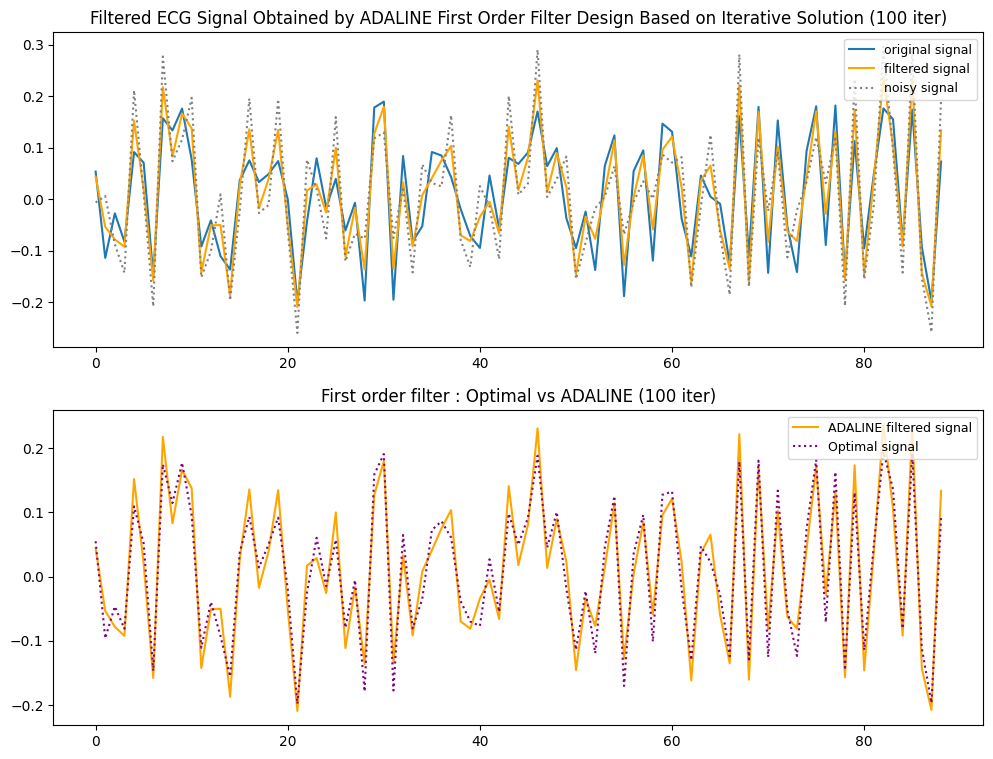

In [9]:
def adaline_first_order(nb_iteration = 100, alpha = 0.01):
  # init
  n = len(t) - 1
  w11 = 0
  w12 = 0

  vk         = np.array(v[1:90])
  vk_minus_1 = np.array(v[0:89])
  T = t[1:90]
  a1_iterative = np.zeros(n);
  e1_iterative = np.zeros(n);

  for i in range(nb_iteration):
    k = np.random.randint(1, n)
    w11 = w11 + 2 * alpha * e1_iterative[k] * vk[k]
    w12 = w12 + 2 * alpha * e1_iterative[k] * vk_minus_1[k]

    a1_iterative = w11 * vk + w12 * vk_minus_1
    e1_iterative = T - a1_iterative

  print(f"For ADALINE first order filter (iterations {nb_iteration}, alpha = {alpha}):\nw11 = {w11} and w12 = {w12}")
  print()

  fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9))

  ax1.set_title(f"Filtered ECG Signal Obtained by ADALINE First Order Filter Design Based on Iterative Solution ({nb_iteration} iter)")
  ax1.plot(S[1:90])
  ax1.plot(e1_iterative, 'orange')
  ax1.plot(T, color='grey', linestyle=':')
  ax1.legend(('original signal',f"filtered signal",'noisy signal'),loc='upper right', prop={'size': 9})

  ax2.set_title(f"First order filter : Optimal vs ADALINE ({nb_iteration} iter)")
  ax2.plot(e1_iterative, 'orange')
  ax2.plot(e1, color='purple', linestyle=':')
  ax2.legend((f"ADALINE filtered signal",'Optimal signal'),loc='upper right', prop={'size': 9})

  plt.show()
  return e1_iterative


# 100 iterations .......................
e1_iterative = adaline_first_order(nb_iteration = 100, alpha = 0.01)

# Analyse
On peut remarquer qu'avec 100 iteration, le signal filtré de la methode ADALINE first order est meilleur que le signal bruité et se rapproche du signal original. Cependant ce n'est pas aussi bien que qu'avec la methode first order optimal.

---



For ADALINE first order filter (iterations 1000, alpha = 0.01):
w11 = -0.036266061734409175 and w12 = -0.12868365933825374



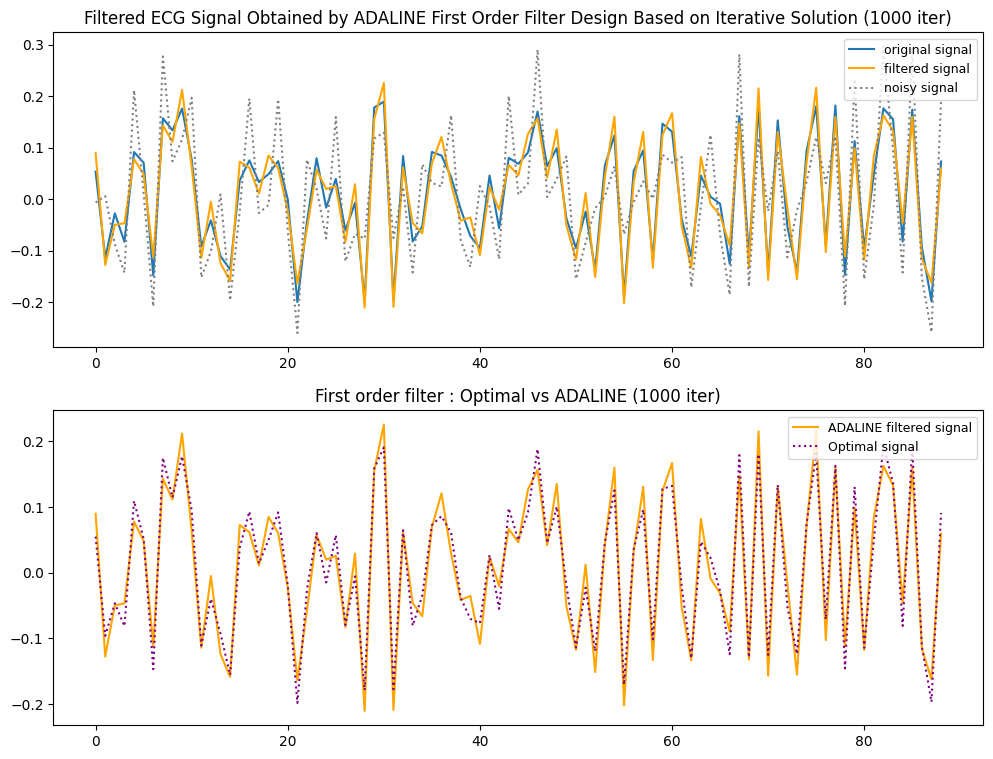

In [10]:
# 1000 iteration .......................
e1_iterative = adaline_first_order(nb_iteration = 1000, alpha = 0.01)

 En augmentant le nombre d'itération, on remarque que la précision de la méthode ADALINE s'améliore et se rapproche de la méthode first order optimale.

---



# Second Order Filter Design: ADALINE Design based on Iterative Solution
- The optimal solution is obtained by minimizing least mean square (LMS) between the unfiletered signal $T(k)$ considered as target signal and the output of ADALINE network given by $a(k)=w_{11}v(k)+w_{12}v(k-1)+ w_{13}v(k-2)$.

For ADALINE second order filter (iterations 1000, alpha = 0.01):
w11 = 0.0028502588265743927, w12 = -0.04257596860804573 and  w13 = 0.03972570978147153



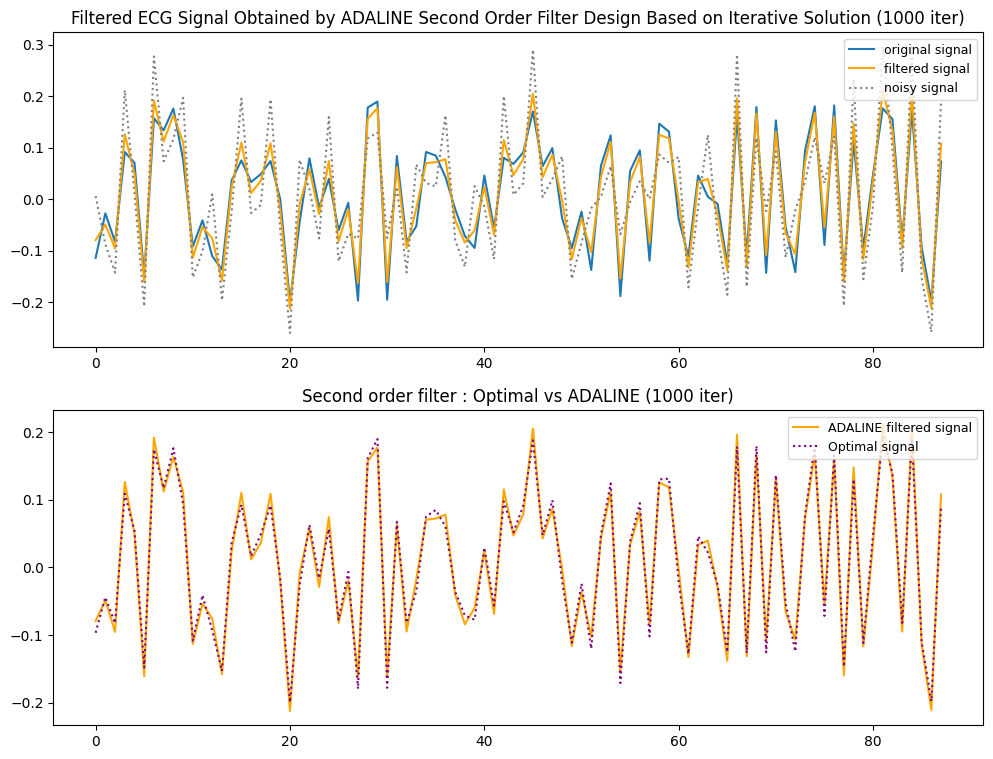

In [11]:
def adaline_second_order(nb_iteration = 100, alpha = 0.01):
  # init
  n = len(t) - 2
  w11 = 0
  w12 = 0
  w13 = 0

  vk         = np.array(v[2:90])
  vk_minus_1 = np.array(v[1:89])
  vk_minus_2 = np.array(v[0:88])

  T = t[2:90]
  a2_iterative = np.zeros(n);
  e2_iterative = np.zeros(n);

  for i in range(nb_iteration):
    k = np.random.randint(1, n)
    w11 = w11 + 2 * alpha * e2_iterative[k] * vk[k]
    w12 = w12 + 2 * alpha * e2_iterative[k] * vk_minus_1[k]
    w13 = w13 + 2 * alpha * e2_iterative[k] * vk_minus_2[k]

    a2_iterative = w11 * vk + w12 * vk_minus_1 + w13 * vk_minus_2
    e2_iterative = T - a2_iterative

  print(f"For ADALINE second order filter (iterations {nb_iteration}, alpha = {alpha}):\nw11 = {w11}, w12 = {w12} and  w13 = {w13}")
  print()

  fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9))

  ax1.set_title(f"Filtered ECG Signal Obtained by ADALINE Second Order Filter Design Based on Iterative Solution ({nb_iteration} iter)")
  ax1.plot(S[2:90])
  ax1.plot(e2_iterative, 'orange')
  ax1.plot(T, color='grey', linestyle=':')
  ax1.legend(('original signal','filtered signal','noisy signal'),loc='upper right', prop={'size': 9})

  ax2.set_title(f"Second order filter : Optimal vs ADALINE ({nb_iteration} iter)")
  ax2.plot(e2_iterative, 'orange')
  ax2.plot(e2, color='purple', linestyle=':')
  ax2.legend(('ADALINE filtered signal','Optimal signal'),loc='upper right', prop={'size': 9})

  plt.show()
  return e2_iterative


# 1000 iteration .......................
e2_iterative = adaline_second_order(nb_iteration = 1000, alpha = 0.01)

## Check difference between ADALINE Iterative E1 and E2

Original signal MSE diff :
- First order : 0.000663665823574493
- Second order: 0.0006138383612748671
- Diffence E1 E2: 4.982746229962589e-05



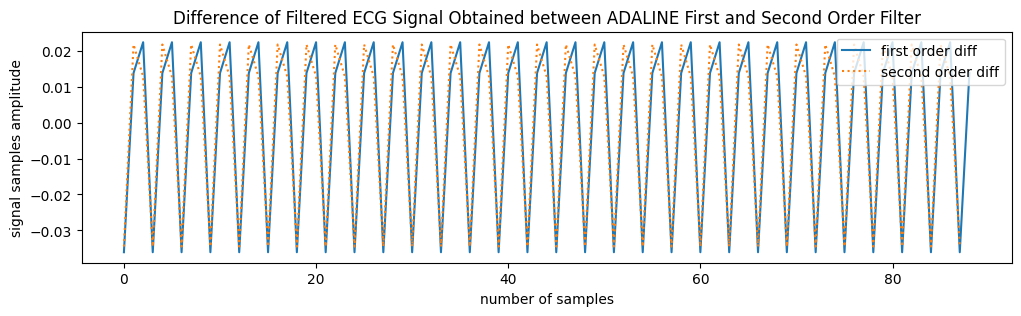

In [12]:
## Mean Square Error for original signal
diff_original_1_iter = S[1:90] - e1_iterative
diff_original_2_iter = S[2:90] - e2_iterative
MSE_E1_ITER = ((diff_original_1_iter) ** 2).mean()
MSE_E2_ITER = ((diff_original_2_iter) ** 2).mean()

print('Original signal MSE diff :')
print("- First order : {}".format(MSE_E1_ITER))
print("- Second order: {}".format(MSE_E2_ITER))
print("- Diffence E1 E2: {}".format(MSE_E1_ITER - MSE_E2_ITER))
print()
#...................................
plt.figure(5,figsize=(12,3))
plt.plot(diff_original_1_iter)
plt.plot(diff_original_2_iter, ':')
plt.legend(['first order diff', 'second order diff'], loc='upper right')
plt.title('Difference of Filtered ECG Signal Obtained between ADALINE First and Second Order Filter')
plt.xlabel('number of samples')
plt.ylabel('signal samples amplitude')
plt.show()

Avec le ADALINE second order filter, on observe qu'ici avec les mêmes paramètres (nb iter = 1000 & aplha = 0,01), on obtient des résultats plus précises et rapproché du signal original comparé au first order filter. Même si encore une fois, c'est une différence minime.

# Filter Design: ADALINE Design based using KERAS
- The optimal solution is obtained by minimizing **least mean square** (LMS) between the unfiltered signal $T(k)$ considered as target signal and the output of ADALINE network.
- KERAS allow to define optimization algorithms and paremetters


In [13]:
# Setup first order model with KERAS
model = models.Sequential()
model.add(layers.Dense(units=1, input_shape=(2,)))
model.add(layers.Dense(units=1))
model.compile(loss='mse', optimizer='sgd')

 # Simulate ADALINE
 - obtain the synaptic weights from network model via **model.get_weights()** and propagate the input signal to the ADALINE output **$a(t)$** using the mathematical expression: $a(k)=w_{11}v(k)+w_{12}v(k-1)$ or  $a(k)=w_{11}v(k)+w_{12}v(k-1)+ w_{13}v(k-2)$ corresponding to first or second order ADALINE flter.

weights : [0.47019187 0.6806777 ]


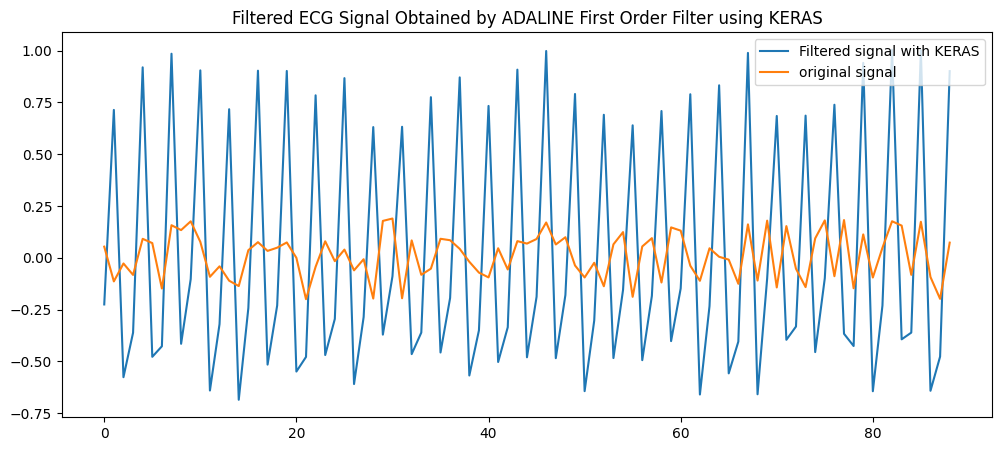

In [14]:
# first order ADALINE flter using KERAS
V = np.array([v[1:90], v[0:89]])
T = t[1:90]
model.fit(V.T, T, epochs=300, batch_size=10, verbose=0)
w1_keras = np.array(model.get_weights()[0]).flatten()
print(f"weights : {w1_keras}")

a1_keras = np.dot(w1_keras.T, V)
e1_keras = T - a1_keras

plt.figure(7, figsize=(12, 5))
plt.plot(e1_keras)
plt.plot(S[1:90])
plt.legend(('Filtered signal with KERAS','original signal'), loc='upper right')
plt.title('Filtered ECG Signal Obtained by ADALINE First Order Filter using KERAS')
plt.show()

weights : [0.34186983 0.4214211  0.28956252]


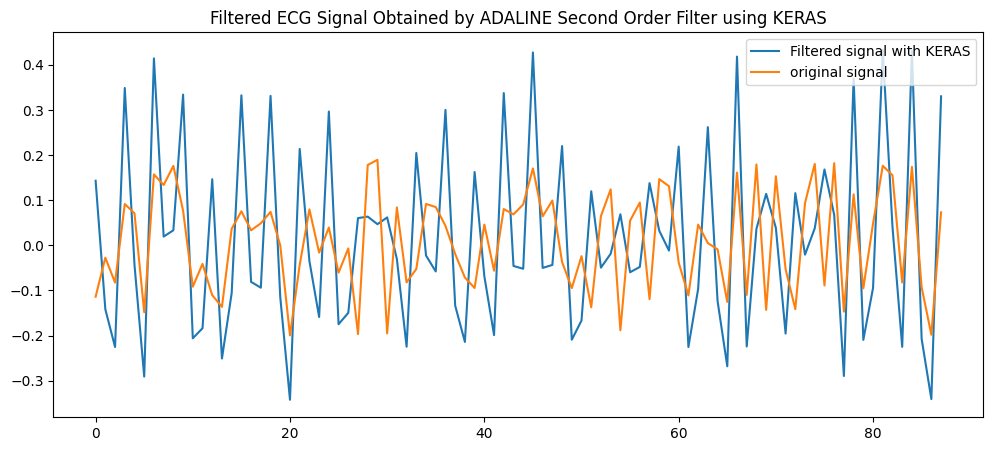

In [15]:
# Setup second order model with KERAS
model2 = models.Sequential()
model2.add(layers.Dense(units=1,input_shape=(3,)))
model2.add(layers.Dense(1))
model2.compile(loss='mse', optimizer='sgd')

# second order ADALINE flter using KERAS
V = np.array([v[2:90], v[1:89], v[0:88]])
T = t[2:90]
model2.fit(V.T, T, epochs=300, batch_size=10, verbose=0)
w2_keras = np.array(model2.get_weights()[0]).flatten()
print(f"weights : {w2_keras}")

a2_keras = np.dot(w2_keras.T, V)
e2_keras = T - a2_keras

plt.figure(8, figsize=(12, 5))
plt.plot(e2_keras)
plt.plot(S[2:90])
plt.legend(('Filtered signal with KERAS','original signal'), loc='upper right')
plt.title('Filtered ECG Signal Obtained by ADALINE Second Order Filter using KERAS')
plt.show()

## Analyse
Les résultats obtenus avec les poids généré par KERAS pour first et second order sont très différents de l'original et sont très loin du résultat attendu.

---



# Simulate ADALINE
 - propagate the input signal using  KERAS command **model.predict(input_NN)** in order to obtain the ADALINE output **$a(t)$**

3/3 [==============================] - 0s 4ms/step


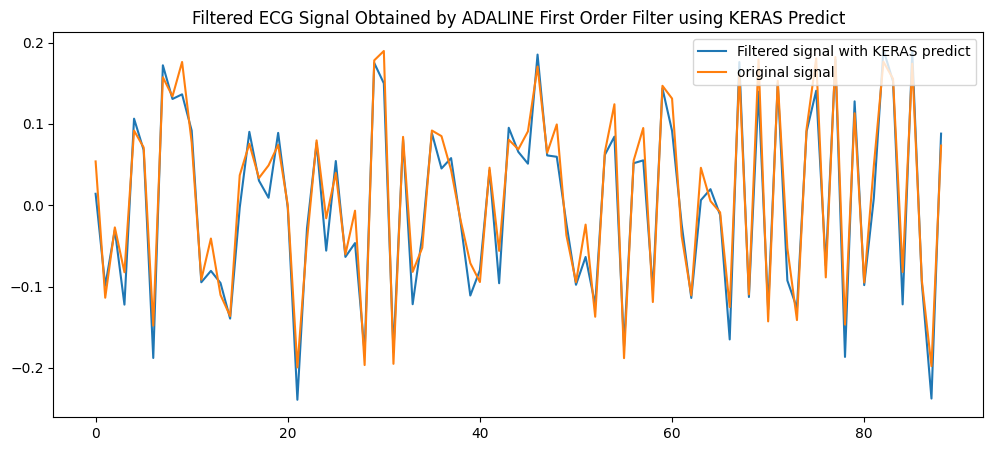

In [16]:
# Using keras predict for first order ADALINE flter
V = np.array([v[1:90], v[0:89]])
T = t[1:90]
a1_keras_predict = model.predict(V.T).flatten()

e1_keras_predict = T - a1_keras_predict
plt.figure(9, figsize=(12, 5))
plt.plot(e1_keras_predict)
plt.plot(S[1:90])
plt.legend(('Filtered signal with KERAS predict','original signal'),loc='upper right')
plt.title('Filtered ECG Signal Obtained by ADALINE First Order Filter using KERAS Predict')
plt.show()

3/3 [==============================] - 0s 4ms/step


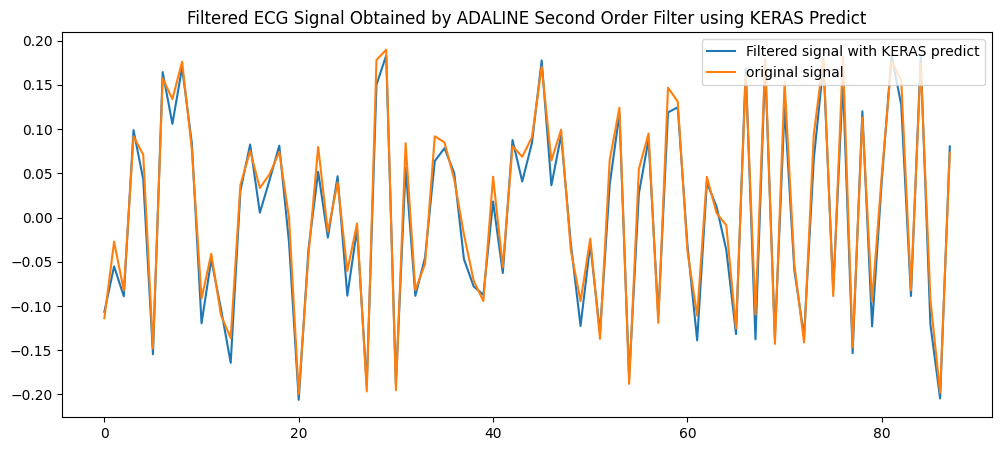

In [17]:
# Using keras predict for second order ADALINE flter
V = np.array([v[2:90], v[1:89], v[0:88]])
T = t[2:90]
a2_keras_predict = model2.predict(V.T).flatten()

e2_keras_predict = T - a2_keras_predict
plt.figure(9, figsize=(12, 5))
plt.plot(e2_keras_predict)
plt.plot(S[2:90])
plt.legend(('Filtered signal with KERAS predict','original signal'),loc='upper right')
plt.title('Filtered ECG Signal Obtained by ADALINE Second Order Filter using KERAS Predict')
plt.show()

Original signal MSE KERAS predict diff :
- First order : 0.000609664639203324
- Second order: 0.00028905542144349076
- Diffence E1 E2: 0.0003206092177598332



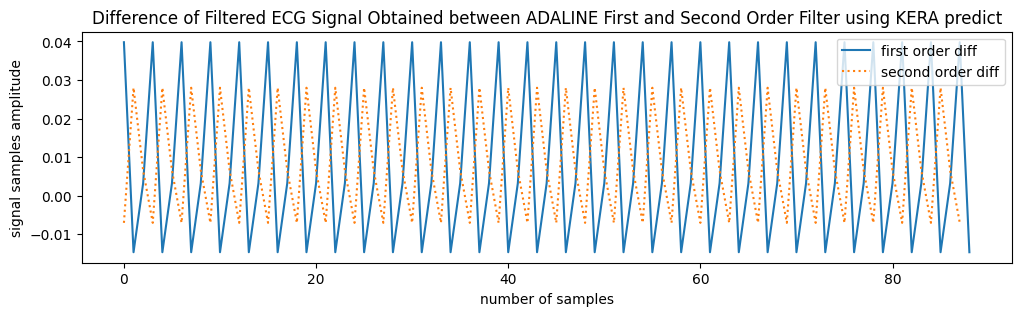

In [18]:
## Mean Square Error for original signal
diff_original_1_keras = S[1:90] - e1_keras_predict
diff_original_2_keras = S[2:90] - e2_keras_predict
MSE_E1_KERAS = ((diff_original_1_keras) ** 2).mean()
MSE_E2_KERAS = ((diff_original_2_keras) ** 2).mean()

print('Original signal MSE KERAS predict diff :')
print("- First order : {}".format(MSE_E1_KERAS))
print("- Second order: {}".format(MSE_E2_KERAS))
print("- Diffence E1 E2: {}".format(MSE_E1_KERAS - MSE_E2_KERAS))
print()
#...................................
plt.figure(5,figsize=(12,3))
plt.plot(diff_original_1_keras)
plt.plot(diff_original_2_keras, ':')
plt.legend(['first order diff', 'second order diff'], loc='upper right')
plt.title('Difference of Filtered ECG Signal Obtained between ADALINE First and Second Order Filter using KERA predict')
plt.xlabel('number of samples')
plt.ylabel('signal samples amplitude')
plt.show()

# Analyse
En utilisant KERAS predict, le résultat s'est nettement amelioré et est proche du signal original.